In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import cv2

In [8]:
data_path = pathlib.Path("Data") 
image_path = data_path /  'fundus_images'
simple_model_subset_path = data_path/ 'simple_model_subset.csv'
cnn_subset_path = data_path/ 'cnn_subset.csv'
print(cnn_subset_path)


Data\cnn_subset.csv


In [9]:
simple_model_subset = pd.read_csv(simple_model_subset_path)#, index_col=0)
cnn_subset = pd.read_csv(cnn_subset_path)#, index_col=0)
simple_model_subset.info()  #data is balanced
cnn_subset.info()           #data is balanced 

print(simple_model_subset)
print(cnn_subset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  300 non-null    int64 
 1   image       300 non-null    object
 2   quality     300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   image       1000 non-null   object
 2   quality     1000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 23.6+ KB
     Unnamed: 0            image  quality
0             0  10218_right.png        1
1             1   10230_left.png        1
2             2  10255_right.png        1
3             3   1034_right.png        0
4             4  10457_right.png        0
..          ...              ...      

<AxesSubplot:>

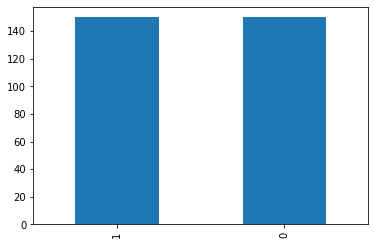

In [10]:
# check if data is balance or imbalance
simple_model_subset['quality'].value_counts().plot(kind = 'bar')


<AxesSubplot:>

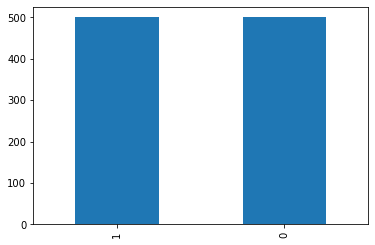

In [11]:
cnn_subset['quality'].value_counts().plot(kind = 'bar')

In [12]:
import glob
glob.glob(f'{image_path}/*.png')

['Data\\fundus_images\\10218_left.png',
 'Data\\fundus_images\\10218_right.png',
 'Data\\fundus_images\\10230_left.png',
 'Data\\fundus_images\\10230_right.png',
 'Data\\fundus_images\\10234_right.png',
 'Data\\fundus_images\\10255_right.png',
 'Data\\fundus_images\\10340_left.png',
 'Data\\fundus_images\\1034_right.png',
 'Data\\fundus_images\\10391_right.png',
 'Data\\fundus_images\\1040_right.png',
 'Data\\fundus_images\\10444_left.png',
 'Data\\fundus_images\\10457_right.png',
 'Data\\fundus_images\\10468_right.png',
 'Data\\fundus_images\\10503_left.png',
 'Data\\fundus_images\\10534_left.png',
 'Data\\fundus_images\\10558_right.png',
 'Data\\fundus_images\\10567_left.png',
 'Data\\fundus_images\\10623_left.png',
 'Data\\fundus_images\\10640_left.png',
 'Data\\fundus_images\\10645_left.png',
 'Data\\fundus_images\\10647_left.png',
 'Data\\fundus_images\\10694_left.png',
 'Data\\fundus_images\\10732_left.png',
 'Data\\fundus_images\\10781_right.png',
 'Data\\fundus_images\\10794_ri

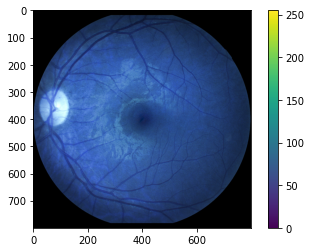

In [13]:
import cv2
import glob
images = [cv2.imread(file) for file in glob.glob(f'{image_path}/*.png')]

import random
plt.figure()
plt.imshow(random.sample(images, 1)[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [48]:
 simple_model_subset[simple_model_subset['quality']==1]['image'].tolist()

['10218_right.png',
 '10230_left.png',
 '10255_right.png',
 '10567_left.png',
 '10623_left.png',
 '10640_left.png',
 '10645_left.png',
 '10891_left.png',
 '1092_left.png',
 '10976_left.png',
 '11050_left.png',
 '11198_right.png',
 '11485_left.png',
 '11849_right.png',
 '1222_left.png',
 '12630_right.png',
 '12735_right.png',
 '12979_right.png',
 '13251_left.png',
 '13387_left.png',
 '13579_left.png',
 '13588_left.png',
 '13673_right.png',
 '14216_left.png',
 '14384_right.png',
 '14474_left.png',
 '14770_left.png',
 '15103_left.png',
 '15688_left.png',
 '16196_right.png',
 '16499_right.png',
 '16622_left.png',
 '16803_left.png',
 '17092_right.png',
 '17170_left.png',
 '1741_left.png',
 '1749_left.png',
 '17663_left.png',
 '17684_right.png',
 '18092_left.png',
 '18109_left.png',
 '18325_left.png',
 '18539_left.png',
 '18686_left.png',
 '18819_left.png',
 '18922_left.png',
 '19046_left.png',
 '19047_left.png',
 '19223_left.png',
 '19512_left.png',
 '19858_right.png',
 '22241_right.png',
 

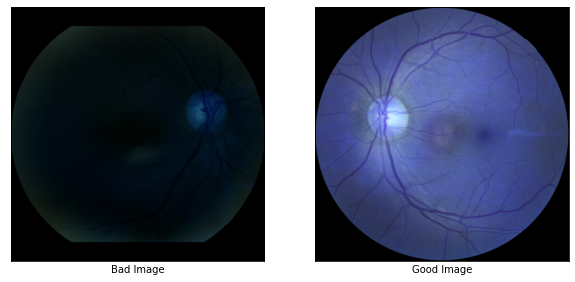

In [14]:
import cv2
import glob
bad_images = [ cv2.imread(f"{image_path}/{file}") for file in simple_model_subset[simple_model_subset['quality']==1]['image'].tolist()]
good_images = [ cv2.imread(f"{image_path}/{file}") for file in simple_model_subset[simple_model_subset['quality']==0]['image'].tolist()]

import random
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(random.sample(bad_images, 1)[0])
plt.xlabel("Bad Image")

plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(random.sample(good_images, 1)[0])
plt.xlabel("Good Image")
plt.show()

<ipython-input-15-7d5f43c4a356>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(5,2,1+i)


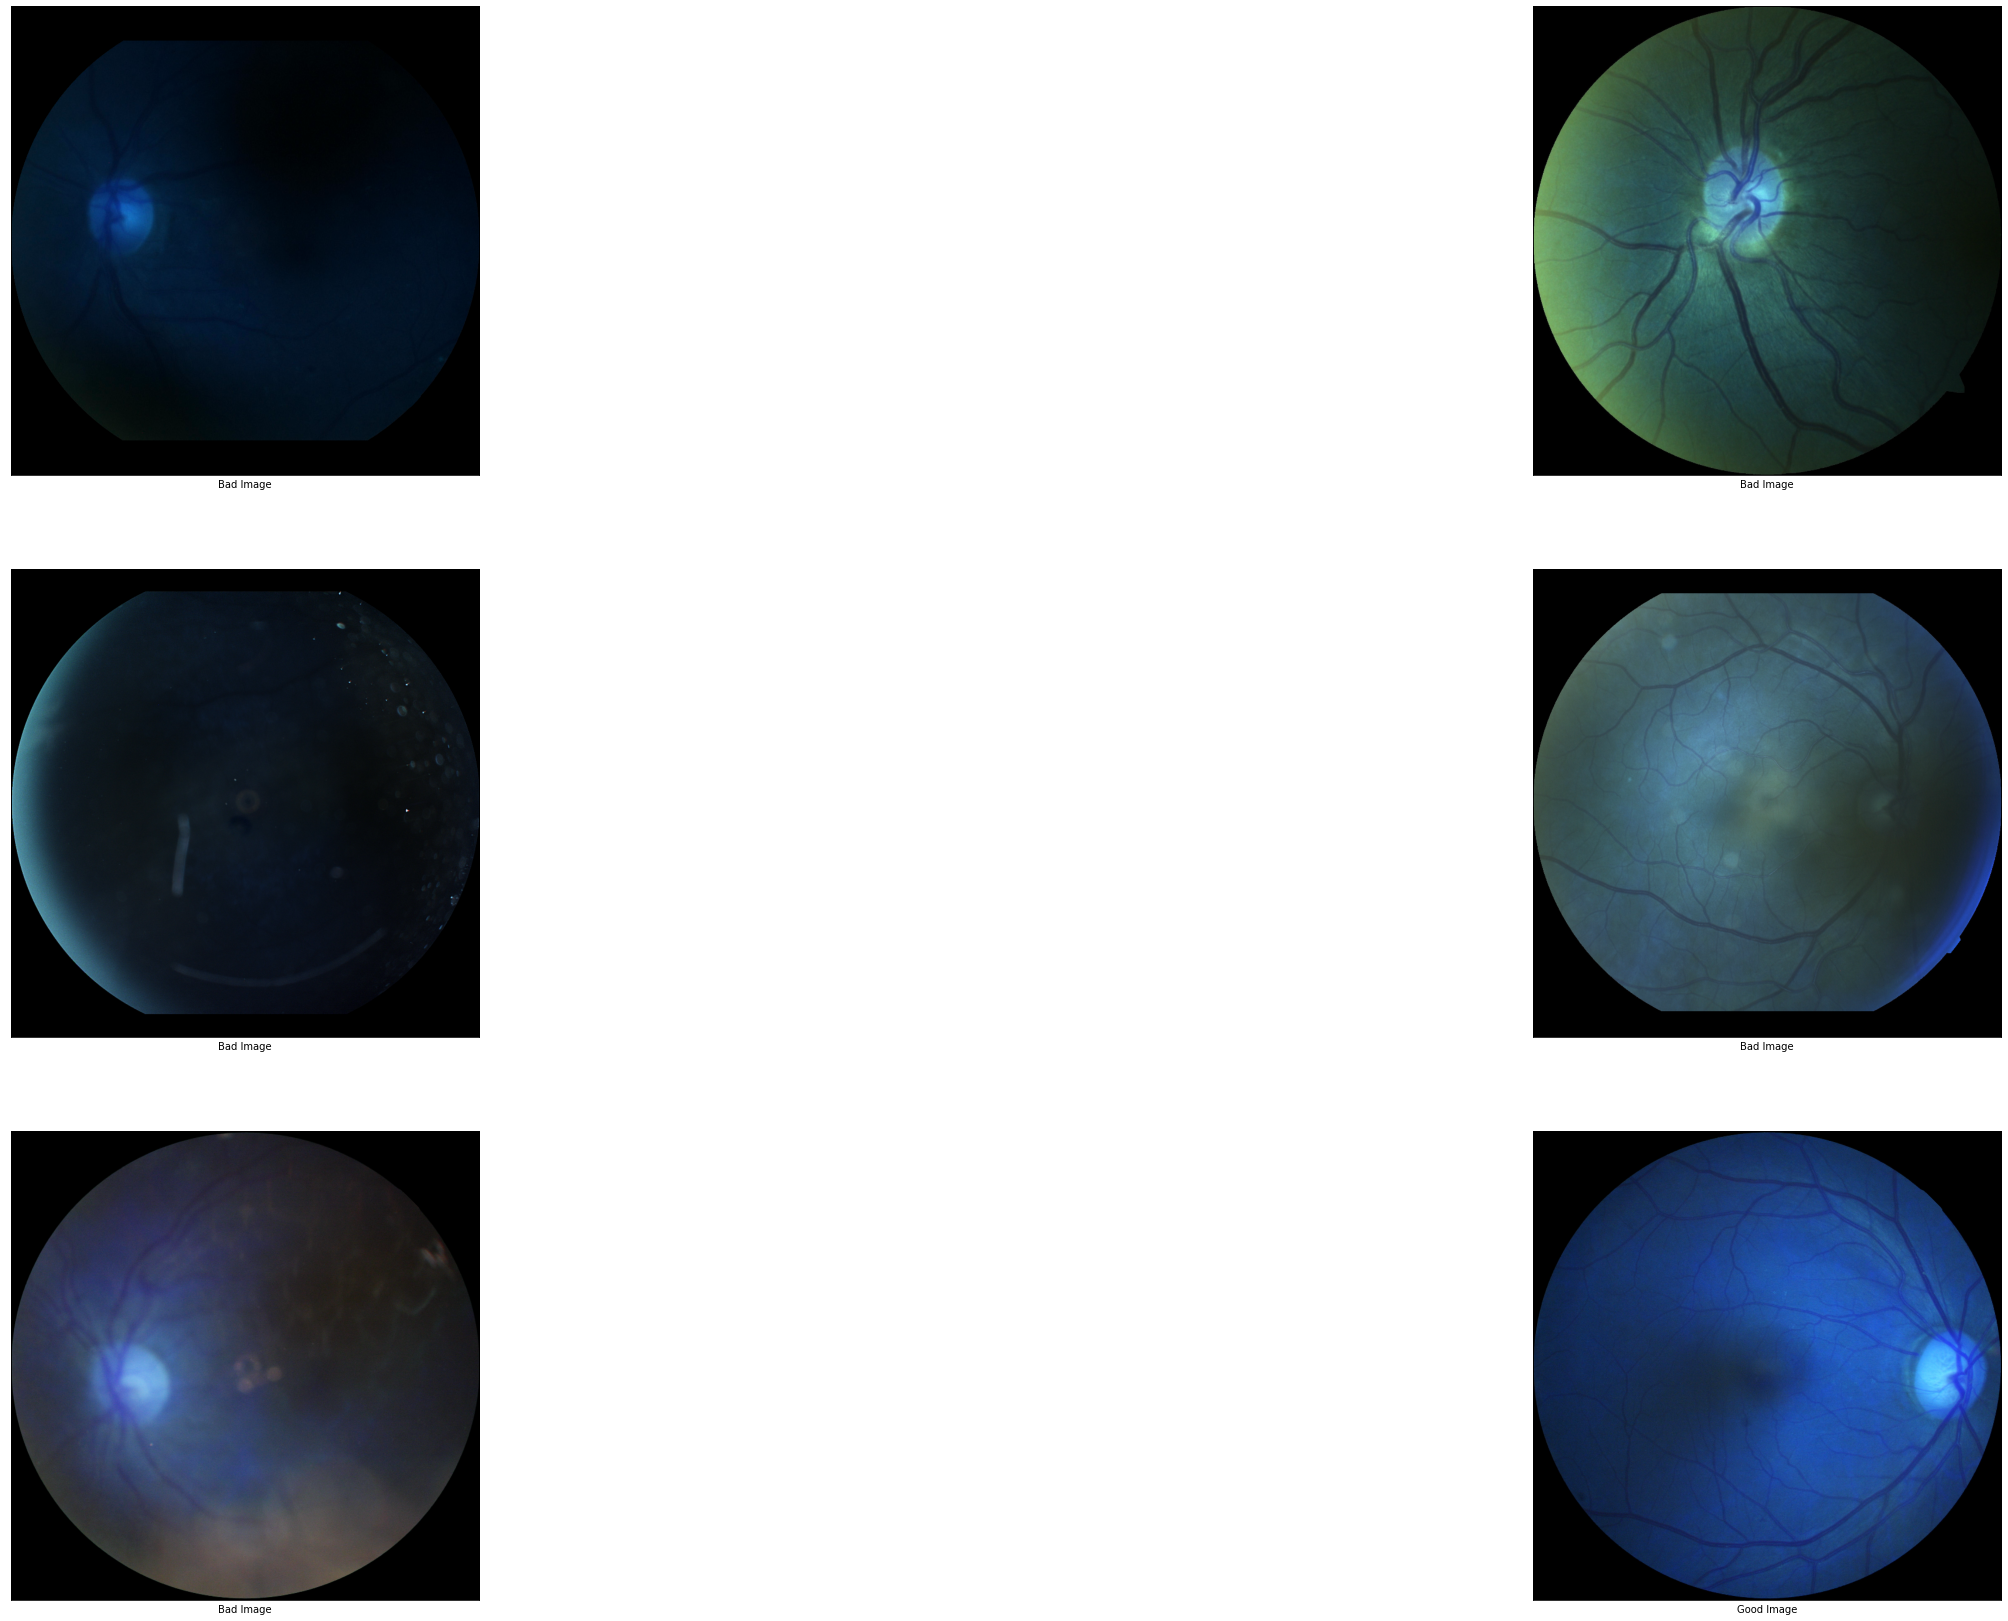

In [15]:
#explore Data
plt.figure(figsize=(50,50))
for i in range(5):
    plt.subplot(5,2,1+i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(random.sample(bad_images, 1)[0])
    plt.xlabel("Bad Image")

    plt.subplot(5,2,2+i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(random.sample(good_images, 1)[0])
    plt.xlabel("Good Image")
plt.show()

In [16]:
print(len(good_images),len(bad_images))

def preprocess(good_images, bad_images):
    X = list.copy(good_images)
    X.extend(bad_images)
    y = list.copy(list(np.zeros(len(bad_images)))) 
    y.extend(np.ones(len(good_images)))
    X = [x.reshape(-1) for x in X]
    return X, y

X, y = preprocess(good_images, bad_images)

print(X[0],y[0])        #good image
print(X[-120],y[-120])  #bad image

150 150
[0 0 0 ... 0 0 0] 0.0
[0 0 0 ... 0 0 0] 1.0


# 1- Simple logisticregression for classification of Fundus images to bad and good quality images

In [17]:
#Data has two categories, bad, good and they are balanced.
#For simple model, I prefer to extract some features like color, mean, std of gray-level,
#signal to noise ratio (SNR), contrast to noise ratio (CNR), Perception based Image Quality 
#Evaluator (PIQE) no-reference image quality score, etc. We can try a classifier and then check 
#feature importance, too. I have no idea if these features are enough good for this classification. 
#We have two categories, so I used logistic regression model. It gives a propability function for two
#categories. Input is numerical values, output is class or categorical. Practically it is a good and 
#simple classifier. 
# I do not have much time, so I selected test_size=0.95. but later you select it 0.25

#splitting data into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

# you can use accuracy or cofusion matrix for evalaution. Since data is balanced accuracy is fine. 

C:\Users\Rozita\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
# Use score method to get accuracy of model
#other ways of measuring model performance (precision, recall, F1 Score, ROC Curve, etc), 
#(fraction of correct predictions): correct predictions / total number of data points
#in case that data are imbalanced, confusion matrix is better, 

#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)
score = logisticRegr.score(x_test, y_test)
print(score)

0.8933333333333333


In [19]:
#Confusion Matrix

import matplotlib.pyplot as plt
from sklearn import metrics

predictions = logisticRegr.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

for i in range(1,len(predictions)):
    print('predict:',predictions[i], 'GT:',y_test[i])

[[35  2]
 [ 6 32]]
predict: 0.0 GT: 1.0
predict: 0.0 GT: 0.0
predict: 1.0 GT: 1.0
predict: 1.0 GT: 1.0
predict: 0.0 GT: 0.0
predict: 1.0 GT: 1.0
predict: 1.0 GT: 1.0
predict: 0.0 GT: 0.0
predict: 1.0 GT: 0.0
predict: 1.0 GT: 1.0
predict: 0.0 GT: 0.0
predict: 0.0 GT: 1.0
predict: 0.0 GT: 1.0
predict: 0.0 GT: 0.0
predict: 0.0 GT: 0.0
predict: 1.0 GT: 1.0
predict: 0.0 GT: 0.0
predict: 0.0 GT: 1.0
predict: 1.0 GT: 1.0
predict: 1.0 GT: 1.0
predict: 0.0 GT: 0.0
predict: 0.0 GT: 0.0
predict: 0.0 GT: 0.0
predict: 1.0 GT: 1.0
predict: 0.0 GT: 0.0
predict: 1.0 GT: 1.0
predict: 1.0 GT: 1.0
predict: 1.0 GT: 1.0
predict: 1.0 GT: 1.0
predict: 0.0 GT: 0.0
predict: 0.0 GT: 0.0
predict: 0.0 GT: 0.0
predict: 0.0 GT: 0.0
predict: 1.0 GT: 1.0
predict: 1.0 GT: 1.0
predict: 1.0 GT: 1.0
predict: 1.0 GT: 1.0
predict: 1.0 GT: 1.0
predict: 0.0 GT: 0.0
predict: 0.0 GT: 1.0
predict: 0.0 GT: 0.0
predict: 0.0 GT: 0.0
predict: 0.0 GT: 0.0
predict: 0.0 GT: 0.0
predict: 0.0 GT: 0.0
predict: 0.0 GT: 1.0
predict: 0.0 GT

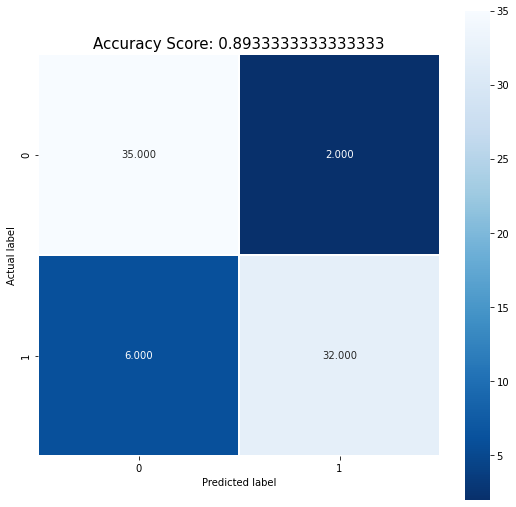

In [20]:
#visualization of confusion matrix

import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# 2) Transfer Learning for quality classification

In [21]:
# Costum Fundus Dataset
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pathlib
import cv2
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as TF

from __future__ import print_function, division
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
import time
import os
import copy

plt.ion()   # interactive mode

In [22]:
# Define a class for Dataset
    
class FundusImageDataset(Dataset):
      
    def __init__(self,annotations_file='./Data/cnn_subset.csv',img_dir='./Data/fundus_images/'): #, transform=None, target_transform=None):
        
        #source Dir
      #  img_dir='C:/Users/Rozita/Documents/jo app 2021/tesseract/Tesseract ML Challenge/Tesseract ML Challenge/fundus_images/'
        #traget Dir
        annotations_file='C:/Users/Rozita/Documents/jo app 2021/tesseract/Tesseract ML Challenge/Tesseract ML Challenge/Data/cnn_subset.csv'
        self.img_labels = pd.read_csv(annotations_file)
      #  print('Label of Data reading is done')
      #  self.img_dir = img_dir
        
        ################################------------------------------------------------------------
        data_path = pathlib.Path("Data") 
        self.image_path = data_path /  'fundus_images'
       # simple_model_subset_path = data_path/ 'simple_model_subset.csv'
        cnn_subset_path = data_path/ 'cnn_subset.csv'
        print(cnn_subset_path)
        
        #simple_model_subset = pd.read_csv(simple_model_subset_path)#, index_col=0)
        cnn_subset = pd.read_csv(cnn_subset_path)#, index_col=0)
        #simple_model_subset.info()  #data is balanced
        cnn_subset.info()           #data is balanced 

        self.transform=TF.Compose([ TF.Resize((512),TF.InterpolationMode.BICUBIC),
                                      TF.RandomHorizontalFlip(),
                                     # TF.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.1, hue=0.1),
                                     # TF.RandomAffine(degrees=40, translate=None, scale=(1, 2), shear=15, resample=False, fillcolor=0),
                                      TF.ToTensor(),
                                    #  TF.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                     # TF.ToTensor()
                                       #transforms.Grayscale(),
                                      ])
        
            
       # self.transform = TF.Compose([TF.Resize(100),TF.ToTensor()])
        
        
        bad_images = [ cv2.imread(f"{self.image_path}/{file}") for file in cnn_subset[cnn_subset['quality']==1]['image'].tolist()]
        good_images = [ cv2.imread(f"{self.image_path}/{file}") for file in cnn_subset[cnn_subset['quality']==0]['image'].tolist()]
        Allimages=list.copy(good_images)
        Allimages.extend(bad_images)
        Alllabels = list.copy(list(np.zeros(len(bad_images)))) 
        Alllabels.extend(np.ones(len(good_images)))
        #Allimages = [x.reshape(-1) for x in Allimages]
        self.X=Allimages
        self.y=Alllabels
        
    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        
        Sourceimage=self.X[idx]
        label=self.y[idx]
        
       # print(Sourceimage,label)
        
        transform='True'
        
       # Sourceimage= Image.fromarray(Sourceimage)
        
       # print(Sourceimage)
        
        if transform:
            Sourceimage = Image.fromarray(Sourceimage)
            #Sourceimage =np.array(Sourceimage)
            Sourceimage = self.transform(Sourceimage)
            
        return Sourceimage,label
    
dataset = FundusImageDataset()
print("data loaded. total pairs: ", len(dataset))


Data\cnn_subset.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   image       1000 non-null   object
 2   quality     1000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 23.6+ KB
data loaded. total pairs:  1000


In [23]:
#dataset[10]
for i in range(len(dataset)):
    sample = dataset[i]
    
#sample[0]  #print image
#sample[1]  #print label
dataset[0][0]  #print image
dataset[0][1]  #print label
#for i in range(len(dataset)):
#    print(i, dataset[i][0].shape, dataset[i][1])
#    if i==3:
#        break
   
#for imgs,label in dataset:  #to show batches with 64 size
#    print(imgs.shape,label)

0.0

In [24]:
#splitting data into test and train
#from sklearn.model_selection import train_test_split

#test_ratio = 0.2
#valid_ratio = 0.1

#x_train, x_test, y_train, y_test = train_test_split(dataset[:][0], dataset[:][1], test_size=test_ratio, random_state=1, shuffle=True)
#x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=valid_ratio, random_state=1, shuffle=True)
#print(x_train[0].shape, y_train[0])

#import torch
#do not forget to convert everything to tensor
#x_train = torch.tensor(x_train).float()
#x_test = torch.tensor(x_test).float()
#x_valid = torch.tensor(x_valid).float()


In [25]:
#Preparing your data for training with DataLoaders
import torch

train_img_list=1000
train_size = int(train_img_list * 0.8)
test_size = train_img_list - train_size
new_train_size=int(train_size * 0.8)
val_size = train_size-new_train_size

#print(train_size, test_size,val_size)

train_set, test_set = torch.utils.data.random_split(dataset, [train_size, test_size])
train_set, val_set = torch.utils.data.random_split(train_set, [new_train_size, val_size])


from torch.utils.data import DataLoader
train_loader = DataLoader(train_set, batch_size=4, shuffle=True)
val_loader = DataLoader(val_set, batch_size=4, shuffle=True)
test_loader = DataLoader(test_set, batch_size=10, shuffle=True)


print('Train=',new_train_size,'val=',val_size,'test=',test_size, 'loading done')

Train= 640 val= 160 test= 200 loading done


Feature batch shape: torch.Size([4, 3, 512, 512])
Labels batch shape: torch.Size([4])


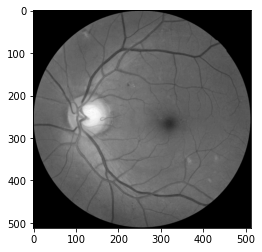

Label: 0.0


In [26]:
# Display image and label.

#Iterate through the DataLoader
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img[1,:,:], cmap="gray")
plt.show()
print(f"Label: {label}")

In [27]:
#train_features.size()
#img=train_features.squeeze()
#plt.imshow(img[0,:,:], cmap="gray")
#plt.show()

In [28]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(256),
        #transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.1, hue=0.1),
        transforms.RandomAffine(degrees=40, translate=None, scale=(1, 2), shear=15, resample=False, fillcolor=0),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
      #  transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
       # transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}


#image_datasets={'train':(train_set, data_transforms['train']),'val':(val_set,data_transforms['val']),'test':(test_set,data_transforms['test'])}

image_datasets={'train':train_set,'val':val_set,'test':test_set}


#data_dir  = '//content//sampleimages//PlateClassification//'
#image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
#                                          data_transforms[x])
#                  for x in ['train', 'val','test']}

#dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=1,
#                                             shuffle=True, num_workers=1)
#              for x in ['train', 'val','test']}

Dataloaders={'train':train_loader,'val':val_loader,'test':test_loader}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val','test']}
print('Number of training images:',dataset_sizes['train'])
print('Number of Validation images:',dataset_sizes['val'])
print('Number of Test images:',dataset_sizes['test'])
#class_names = image_datasets['train'].classes
#print(class_names)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Number of training images: 640
Number of Validation images: 160
Number of Test images: 200


C:\Users\Rozita\anaconda3\lib\site-packages\torchvision\transforms\transforms.py:1343: UserWarning: Argument resample is deprecated and will be removed since v0.10.0. Please, use interpolation instead
  warnings.warn(
C:\Users\Rozita\anaconda3\lib\site-packages\torchvision\transforms\transforms.py:1357: UserWarning: Argument fillcolor is deprecated and will be removed since v0.10.0. Please, use fill instead
  warnings.warn(


In [29]:
#print(train_set[0][0],train_set[0][1])

In [30]:
# Get a batch of training data
#inputs, classes = next(iter(train_loader)) #or
inputs, classes = next(iter(Dataloaders['train']))
print(inputs,classes)

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
        

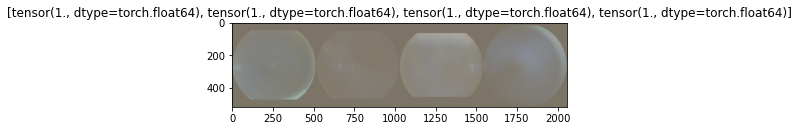

tensor([1., 1., 1., 1.], dtype=torch.float64)


In [31]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(Dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

#class_names = image_datasets['train'].classes
#class_names = image_datasets['train']
#print(class_names[0][1])

#class_names=class_names[0][1]

#imshow(out, title=[class_names[x] for x in classes])
imshow(out, title=[classes[x] for x in range(0,len(classes))])

print(classes)  

In [32]:
def train_model(model, criterion, optimizer, scheduler, num_epochs):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in Dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device).long()

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    #print(outputs, labels)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [33]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(Dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device).long()

           # print(labels)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
               # ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                ax.set_title('predicted: {}'.format(preds[j]))
                imshow(inputs.cpu().data[j])#,title=[classes[x] for x in range(0,len(labels))] )

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [34]:
#Basics of image classification in machine learning

#https://d-nb.info/1207913499/34

#https://iq.opengenus.org/basics-of-machine-learning-image-classification-techniques/

#https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
#https://pytorch.org/tutorials/recipes/recipes/zeroing_out_gradients.html
#https://pytorch.org/tutorials/intermediate/flask_rest_api_tutorial.html

# Feature Descriptor based on histogram of gray-scales in each channel
#https://towardsdatascience.com/multi-view-image-classification-427c69720f30
# For hard cases
#https://github.com/SAMY-ER/computervision-recipes/tree/master/scenarios/classification

# use this one for better visualization and classification
#https://github.com/SAMY-ER/computervision-recipes/blob/master/scenarios/classification/01_training_introduction.ipynb

#Ensemble NN (VGG16+Resnet50+InceptionV3)
#https://www.kaggle.com/code/krishnakumarkk/ensemble-nn-vgg16-resnet50-inceptionv3?scriptVersionId=52740123

# resnet18

Epoch 0/99
----------
train Loss: 11.3534 Acc: 0.5781
val Loss: 2.0987 Acc: 0.7125

Epoch 1/99
----------
train Loss: 9.0708 Acc: 0.5484
val Loss: 2.8298 Acc: 0.7750

Epoch 2/99
----------
train Loss: 4.9736 Acc: 0.6500
val Loss: 2.8679 Acc: 0.7563

Epoch 3/99
----------
train Loss: 6.2321 Acc: 0.6391
val Loss: 4.3106 Acc: 0.7063

Epoch 4/99
----------
train Loss: 7.6830 Acc: 0.6125
val Loss: 3.6779 Acc: 0.7625

Epoch 5/99
----------
train Loss: 5.3524 Acc: 0.6781
val Loss: 5.9016 Acc: 0.6938

Epoch 6/99
----------
train Loss: 9.0208 Acc: 0.6328
val Loss: 12.6949 Acc: 0.5438

Epoch 7/99
----------
train Loss: 3.2020 Acc: 0.7203
val Loss: 2.5703 Acc: 0.7313

Epoch 8/99
----------
train Loss: 2.4967 Acc: 0.7297
val Loss: 2.5897 Acc: 0.7438

Epoch 9/99
----------
train Loss: 1.8669 Acc: 0.7375
val Loss: 2.5722 Acc: 0.7500

Epoch 10/99
----------
train Loss: 2.0771 Acc: 0.7422
val Loss: 1.9708 Acc: 0.7688

Epoch 11/99
----------
train Loss: 1.8577 Acc: 0.7281
val Loss: 2.2796 Acc: 0.7000



val Loss: 2.6519 Acc: 0.6875

Epoch 98/99
----------
train Loss: 1.2809 Acc: 0.7594
val Loss: 2.2065 Acc: 0.6813

Epoch 99/99
----------
train Loss: 1.1687 Acc: 0.7484
val Loss: 1.8758 Acc: 0.7000

Training complete in 28m 35s
Best val Acc: 0.775000


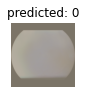

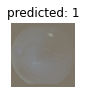

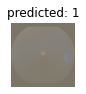

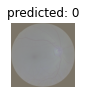

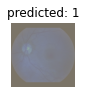

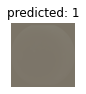

tensor([[83., 18.],
        [29., 70.]])
tensor([0.8218, 0.7071])


In [35]:
model_ft = torchvision.models.resnet18(pretrained=True)
#model_ft = torchvision.models.alexnet(pretrained=True)
#model_ft = torchvisionmodels.googlenet(pretrained=True)

#InceptionV3, Resnet50, VGG16
#my own model

#model_ft = model_ft.eval()#fill in your model here 

# freezing all layers except final
for param in model_ft.parameters():
    param.requires_grad = False
num_ftrs = model_ft.fc.in_features

# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 2) #4

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()
#criterion = nn.NLLLoss()
#criterion = nn.L1Loss()
#criterion = nn.MSELoss()

#criterion = # fill in your loss function here 

# Observe that all parameters are being optimized
#optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.1, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
#optimizer_ft = optim.RMSprop(model_ft.parameters(), lr=0.01, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False)

#optimizer_ft = #fill in your optimizer here

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

#define number of epochs here
number_of_epochs  = 100 #enter your epoch number here

model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,num_epochs=number_of_epochs)

visualize_model(model_ft)
plt.ioff()
plt.show()

nb_classes = 2
confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(Dataloaders['test']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

print(confusion_matrix)

print(confusion_matrix.diag()/confusion_matrix.sum(1))

# Resnet50

Epoch 0/49
----------
train Loss: 7.3394 Acc: 0.5687
val Loss: 1.8298 Acc: 0.7188

Epoch 1/49
----------
train Loss: 4.1645 Acc: 0.6063
val Loss: 13.3324 Acc: 0.4688

Epoch 2/49
----------
train Loss: 4.0834 Acc: 0.6250
val Loss: 1.4413 Acc: 0.7063

Epoch 3/49
----------
train Loss: 3.6633 Acc: 0.6234
val Loss: 1.7844 Acc: 0.7313

Epoch 4/49
----------
train Loss: 3.9139 Acc: 0.6297
val Loss: 1.3759 Acc: 0.7500

Epoch 5/49
----------
train Loss: 3.6729 Acc: 0.6500
val Loss: 1.5784 Acc: 0.7625

Epoch 6/49
----------
train Loss: 3.9133 Acc: 0.6266
val Loss: 3.0103 Acc: 0.6625

Epoch 7/49
----------
train Loss: 1.3707 Acc: 0.7078
val Loss: 1.2089 Acc: 0.7188

Epoch 8/49
----------
train Loss: 1.1204 Acc: 0.7484
val Loss: 1.1283 Acc: 0.7063

Epoch 9/49
----------
train Loss: 0.9456 Acc: 0.7359
val Loss: 1.1574 Acc: 0.7000

Epoch 10/49
----------
train Loss: 0.7622 Acc: 0.7734
val Loss: 1.3549 Acc: 0.7063

Epoch 11/49
----------
train Loss: 0.9440 Acc: 0.7063
val Loss: 1.0403 Acc: 0.6875

E

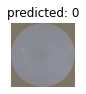

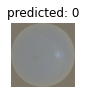

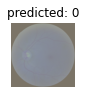

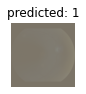

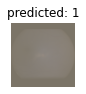

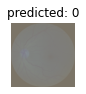

tensor([[77., 24.],
        [19., 80.]])
tensor([0.7624, 0.8081])


In [36]:
model_ft = torchvision.models.resnet50(pretrained=True)
#model_ft = torchvision.models.alexnet(pretrained=True)
#model_ft = torchvisionmodels.googlenet(pretrained=True)

# freezing all layers except final
for param in model_ft.parameters():
    param.requires_grad = False
num_ftrs = model_ft.fc.in_features

model_ft.fc = nn.Linear(num_ftrs, 2) 
model_ft = model_ft.to(device)
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
#optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.1, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
optimizer_ft = optim.RMSprop(model_ft.parameters(), lr=0.01, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

#define number of epochs here
number_of_epochs  = 50 #enter your epoch number here

resnet50 = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=50)
model_ft=resnet50

visualize_model(model_ft)
plt.ioff()
plt.show()

nb_classes = 2
confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(Dataloaders['test']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1
print(confusion_matrix)
print(confusion_matrix.diag()/confusion_matrix.sum(1))

# GoogLeNet

Epoch 0/49
----------
train Loss: 2.8095 Acc: 0.5875
val Loss: 1.0738 Acc: 0.7313

Epoch 1/49
----------
train Loss: 1.7401 Acc: 0.6219
val Loss: 0.8140 Acc: 0.7313

Epoch 2/49
----------
train Loss: 1.7847 Acc: 0.6078
val Loss: 0.7875 Acc: 0.7938

Epoch 3/49
----------
train Loss: 1.7555 Acc: 0.6219
val Loss: 1.0349 Acc: 0.7250

Epoch 4/49
----------
train Loss: 1.7244 Acc: 0.6109
val Loss: 0.8100 Acc: 0.7000

Epoch 5/49
----------
train Loss: 1.5102 Acc: 0.6672
val Loss: 1.2610 Acc: 0.6688

Epoch 6/49
----------
train Loss: 1.5446 Acc: 0.6484
val Loss: 0.7478 Acc: 0.7125

Epoch 7/49
----------
train Loss: 0.9503 Acc: 0.6813
val Loss: 0.5935 Acc: 0.7750

Epoch 8/49
----------
train Loss: 0.8775 Acc: 0.7094
val Loss: 0.6284 Acc: 0.7688

Epoch 9/49
----------
train Loss: 0.8571 Acc: 0.7141
val Loss: 0.5462 Acc: 0.7625

Epoch 10/49
----------
train Loss: 0.8436 Acc: 0.6969
val Loss: 0.5355 Acc: 0.7688

Epoch 11/49
----------
train Loss: 0.8088 Acc: 0.7156
val Loss: 0.5616 Acc: 0.7688

Ep

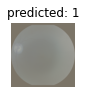

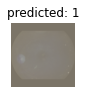

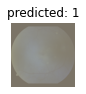

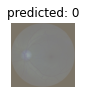

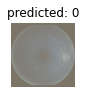

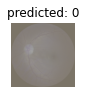

tensor([[68., 33.],
        [14., 85.]])
tensor([0.6733, 0.8586])


In [37]:
#model_ft = torchvision.models.resnet18(pretrained=True)
#model_ft = torchvision.models.alexnet(pretrained=True)
model_ft = torchvision.models.googlenet(pretrained=True)

# freezing all layers except final
for param in model_ft.parameters():
    param.requires_grad = False
num_ftrs = model_ft.fc.in_features

model_ft.fc = nn.Linear(num_ftrs, 2) 
model_ft = model_ft.to(device)
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
#optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.1, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
optimizer_ft = optim.RMSprop(model_ft.parameters(), lr=0.01, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

#define number of epochs here
number_of_epochs  = 50 #enter your epoch number here

googlenet = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=50)
model_ft=googlenet

visualize_model(model_ft)
plt.ioff()
plt.show()

nb_classes = 2
confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(Dataloaders['test']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1
print(confusion_matrix)
print(confusion_matrix.diag()/confusion_matrix.sum(1))

# VGG

1000
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilat

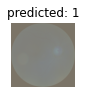

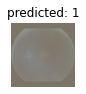

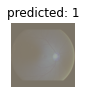

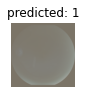

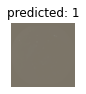

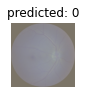

tensor([[76., 25.],
        [26., 73.]])
tensor([0.7525, 0.7374])


In [38]:
#https://www.analyticsvidhya.com/blog/2021/06/transfer-learning-using-vgg16-in-pytorch/
#https://www.kaggle.com/code/carloalbertobarbano/vgg16-transfer-learning-pytorch/notebook
#https://www.kaggle.com/code/carloalbertobarbano/vgg16-transfer-learning-pytorch/notebook


# Load the pretrained model from pytorch
vgg16 = torchvision.models.vgg16(pretrained=True)
#vgg16.load_state_dict(torch.load("../input/vgg16bn/vgg16_bn.pth"))
print(vgg16.classifier[6].out_features) # 1000 

# Freeze training for all layers
for param in vgg16.features.parameters():
    param.require_grad = False

# Newly created modules have require_grad=True by default
num_features = vgg16.classifier[6].in_features
features = list(vgg16.classifier.children())[:-1] # Remove last layer
#features.extend([nn.Linear(num_features, len(class_names))]) # Add our layer with 4 outputs
features.extend([nn.Linear(num_features, 2)]) # Add our layer with 4 outputs
vgg16.classifier = nn.Sequential(*features) # Replace the model classifier
print(vgg16)

vgg16.cuda() #.cuda() will move everything to the GPU side
    
criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(vgg16.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

vgg16 = train_model(vgg16, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=50)
#torch.save(vgg16.state_dict(), 'VGG16_v2-OCT_Retina_half_dataset.pt')

model_ft=vgg16

visualize_model(model_ft)
plt.ioff()
plt.show()

nb_classes = 2
confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(Dataloaders['test']):
        inputs = inputs.to(device)
        classes = classes.to(device).long()
        
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

                
print(confusion_matrix)
print(confusion_matrix.diag()/confusion_matrix.sum(1))

In [ ]:
#https://www.kaggle.com/code/krishnakumarkk/ensemble-nn-vgg16-resnet50-inceptionv3?scriptVersionId=52740123

# Ensemble NN (VGG16+Resnet50+InceptionV3)

In [ ]:
#https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6913385/
#https://paperswithcode.com/sota/image-classification-on-imagenet
#https://github.com/amourav/OCT-Image-Classification/blob/master/README.md
#https://pyimagesearch.com/2017/03/20/imagenet-vggnet-resnet-inception-xception-keras/
#https://towardsdatascience.com/transfer-learning-from-pre-trained-models-f2393f124751
#https://keras.io/examples/vision/image_classification_with_vision_transformer/
#https://towardsdatascience.com/implementing-visualttransformer-in-pytorch-184f9f16f632
#https://github.com/keras-team/keras-io/tree/master/examples

# vision transformer

In [ ]:
#https://towardsdatascience.com/implementing-visualttransformer-in-pytorch-184f9f16f632
#https://keras.io/examples/vision/image_classification_with_vision_transformer/
#https://viso.ai/deep-learning/vision-transformer-vit/
#https://www.youtube.com/watch?v=iSNkClsezMs
